<a href="https://colab.research.google.com/github/norahmasrour/Data-Viz/blob/main/ds3001hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-14-4939c3e79a3f>:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'yes': 1, 'no': 0}, inplace=True)


                  count          mean           std        min        25%  \
price             545.0  4.766729e+06  1.870440e+06  1750000.0  3430000.0   
area              545.0  5.150541e+03  2.170141e+03     1650.0     3600.0   
bedrooms          545.0  2.965138e+00  7.380639e-01        1.0        2.0   
bathrooms         545.0  1.286239e+00  5.024696e-01        1.0        1.0   
stories           545.0  1.805505e+00  8.674925e-01        1.0        1.0   
mainroad          545.0  8.587156e-01  3.486347e-01        0.0        1.0   
guestroom         545.0  1.779817e-01  3.828487e-01        0.0        0.0   
basement          545.0  3.504587e-01  4.775519e-01        0.0        0.0   
hotwaterheating   545.0  4.587156e-02  2.093987e-01        0.0        0.0   
airconditioning   545.0  3.155963e-01  4.651799e-01        0.0        0.0   
parking           545.0  6.935780e-01  8.615858e-01        0.0        0.0   
prefarea          545.0  2.348624e-01  4.243022e-01        0.0        0.0   

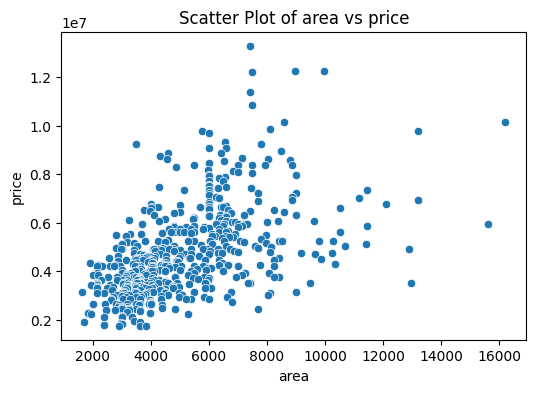

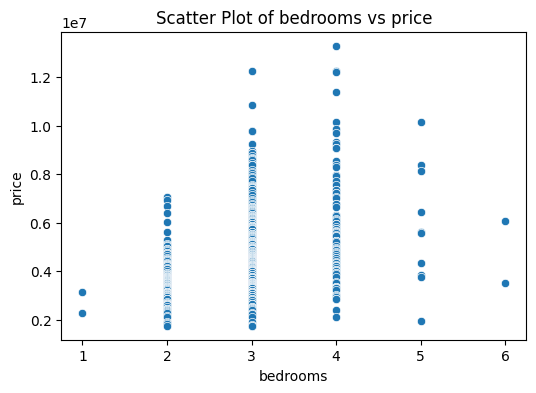

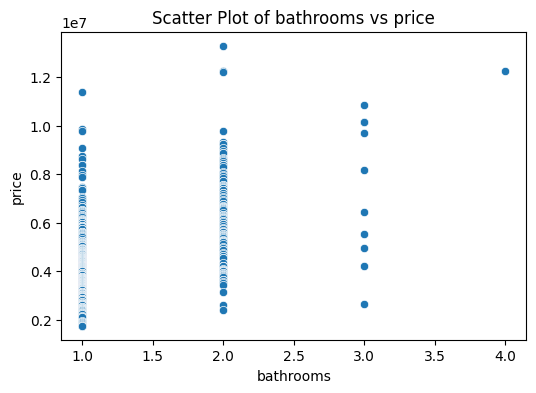

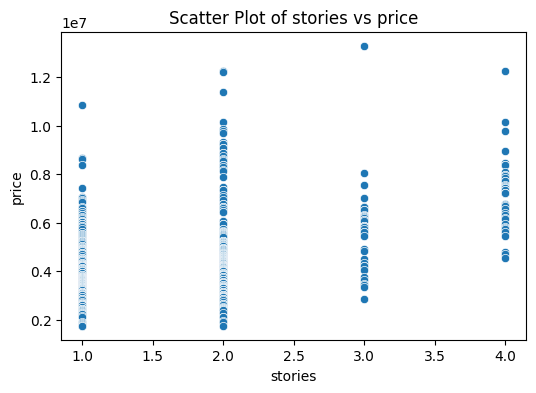

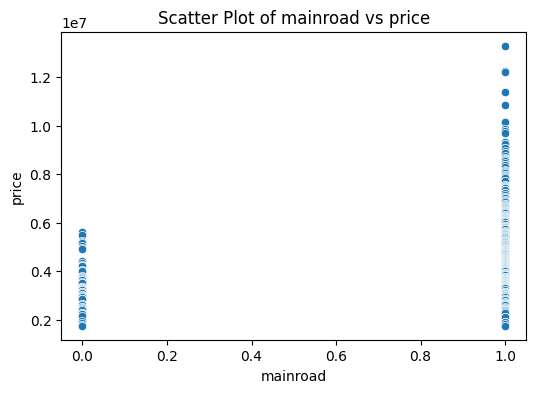

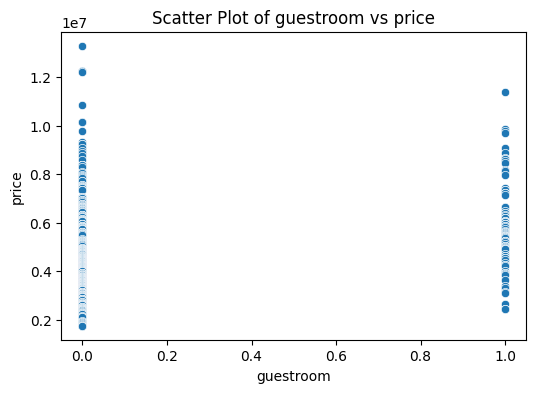

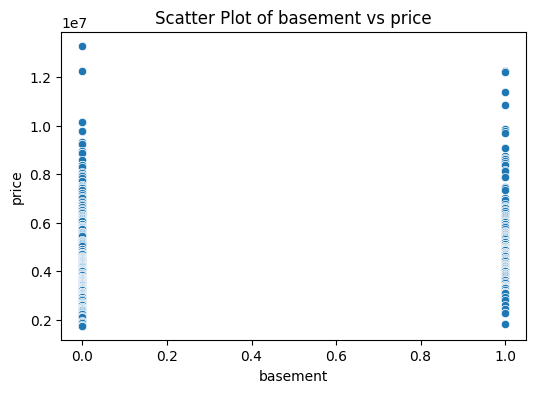

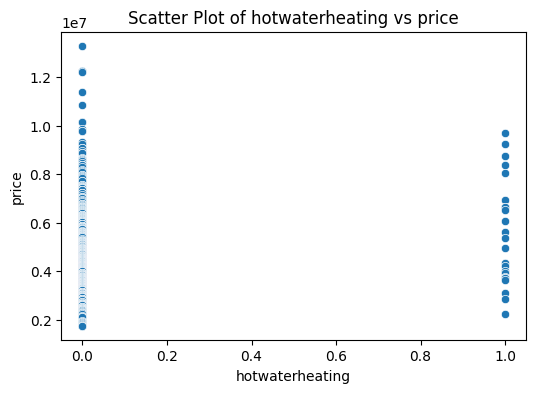

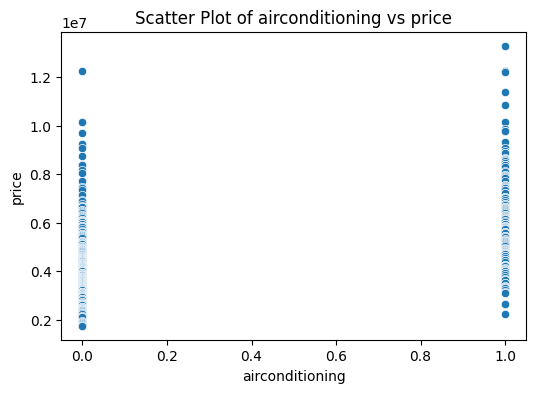

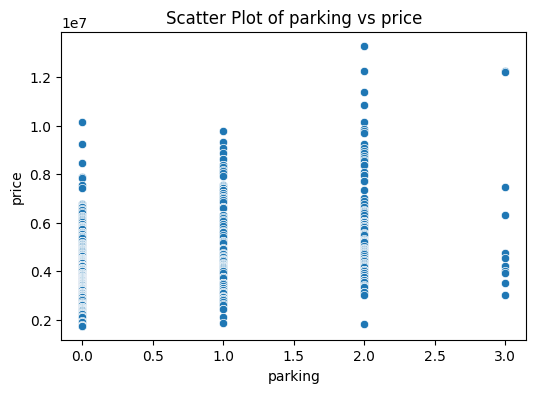

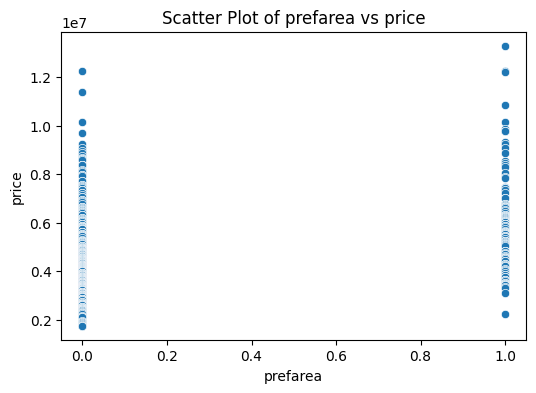

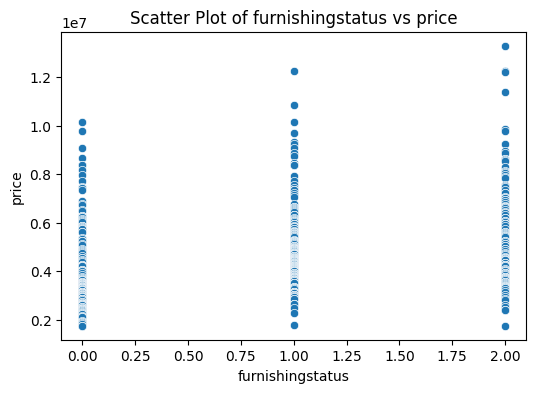

Scatter Plot Interpretation:
The scatter plots show the relationship between each independent variable and house price. 
Variables like area and number of bedrooms appear to have a positive relationship with price, 
meaning that as these values increase, house prices tend to be higher. Other variables may show weaker or no clear trends.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

# Load the dataset
file_path = '/content/HW2.csv'
df = pd.read_csv(file_path)

# Ensure column names are stripped of spaces and converted to lowercase
df.columns = df.columns.str.strip().str.lower()

# Convert categorical variables to numeric
df.replace({'yes': 1, 'no': 0}, inplace=True)
if 'furnishingstatus' in df.columns:
    df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

# Ensure all columns are numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# Display basic statistics
stats = df.describe().transpose()
print(stats)

# Scatter plots for each independent variable against house price
independent_vars = [col for col in df.columns if col != 'price']
for var in independent_vars:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[var], y=df['price'])
    plt.xlabel(var)
    plt.ylabel('price')
    plt.title(f'Scatter Plot of {var} vs price')
    plt.show()

# Interpretation of scatter plots
print("Scatter Plot Interpretation:")
print("The scatter plots show the relationship between each independent variable and house price. ")
print("Variables like area and number of bedrooms appear to have a positive relationship with price, ")
print("meaning that as these values increase, house prices tend to be higher. Other variables may show weaker or no clear trends.")




In [15]:
# Pearson correlation
correlation_matrix = df.corr()
correlations = correlation_matrix['price'].drop('price')
print("Pearson Correlation Coefficients:")
print(correlations)

# Identify the variable with the strongest correlation
best_var = correlations.abs().idxmax()
strongest_correlation = correlations[best_var]
print(f"Variable with strongest correlation: {best_var} (Correlation: {strongest_correlation})")

# Interpretation of correlation coefficients
print("Correlation Interpretation:")
print(f"The strongest correlation is found with {best_var}, suggesting that this variable has the most significant impact on house prices. ")
print("A positive correlation indicates that as this variable increases, house prices tend to rise, whereas a negative correlation would indicate the opposite.")




Pearson Correlation Coefficients:
area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus    0.304721
Name: price, dtype: float64
Variable with strongest correlation: area (Correlation: 0.5359973457780797)
Correlation Interpretation:
The strongest correlation is found with area, suggesting that this variable has the most significant impact on house prices. 
A positive correlation indicates that as this variable increases, house prices tend to rise, whereas a negative correlation would indicate the opposite.


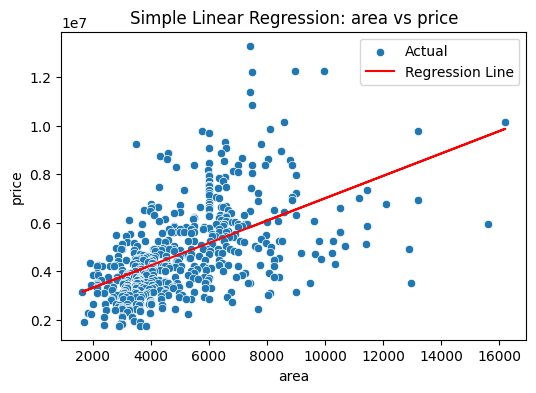

R-squared: 0.2872931546811469
Intercept: 2387308.48239643, Slope: 461.97489427278344
Interpretation: The intercept represents the expected house price when {best_var} is zero. The slope indicates how much the price changes for each unit increase in {best_var}.


In [16]:
# Simple Linear Regression with best variable
X = df[[best_var]]
y = df['price']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Plot regression line
plt.figure(figsize=(6,4))
sns.scatterplot(x=X[best_var], y=y, label='Actual')
plt.plot(X[best_var], y_pred, color='red', label='Regression Line')
plt.xlabel(best_var)
plt.ylabel('price')
plt.title(f'Simple Linear Regression: {best_var} vs price')
plt.legend()
plt.show()

# R-squared value
r_squared = r2_score(y, y_pred)
print(f'R-squared: {r_squared}')

# Interpret slope and intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f'Intercept: {intercept}, Slope: {slope}')
print("Interpretation: The intercept represents the expected house price when {best_var} is zero. The slope indicates how much the price changes for each unit increase in {best_var}.")



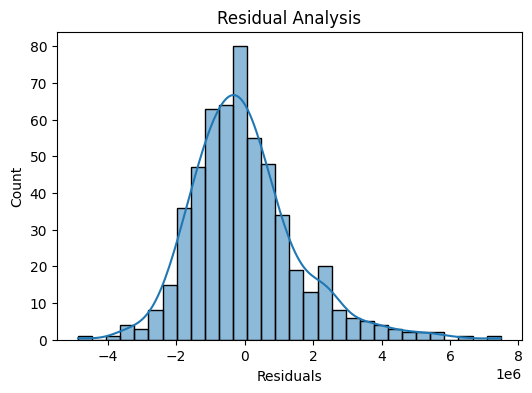

Residual Analysis Interpretation: A normal distribution of residuals suggests that the model is well-fitted. Patterns in residuals may indicate potential issues like non-linearity.


In [17]:
# Residual Analysis
residuals = y - y_pred
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residual Analysis')
plt.show()
print("Residual Analysis Interpretation: A normal distribution of residuals suggests that the model is well-fitted. Patterns in residuals may indicate potential issues like non-linearity.")



In [18]:
# Multiple Linear Regression
X_multi = df[independent_vars]
model_multi = LinearRegression()
model_multi.fit(X_multi, y)
y_pred_multi = model_multi.predict(X_multi)

# R-squared for multiple regression
r_squared_multi = r2_score(y, y_pred_multi)
print(f'Multiple Regression R-squared: {r_squared_multi}')
print("Comparison: The R-squared value of the multiple regression model indicates how much better it explains house price variations compared to the simple regression model.")



Multiple Regression R-squared: 0.680069137617004
Comparison: The R-squared value of the multiple regression model indicates how much better it explains house price variations compared to the simple regression model.


In [19]:
# Coefficients interpretation
coefficients = pd.DataFrame({'Variable': independent_vars, 'Coefficient': model_multi.coef_})
print(coefficients)
print("Coefficient Interpretation: Each coefficient represents the impact of an independent variable on house prices, holding all other variables constant.")



            Variable    Coefficient
0               area     243.906887
1           bedrooms  119474.386467
2          bathrooms  988888.287301
3            stories  450391.517603
4           mainroad  423100.741157
5          guestroom  298030.506780
6           basement  357926.360032
7    hotwaterheating  872936.027141
8    airconditioning  853633.594889
9            parking  279785.637386
10          prefarea  647055.598722
11  furnishingstatus  213187.781458
Coefficient Interpretation: Each coefficient represents the impact of an independent variable on house prices, holding all other variables constant.


In [20]:
# K-Fold Cross Validation (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print(f'Cross-validation R-squared scores: {cross_val_scores}')
print(f'Average R-squared: {np.mean(cross_val_scores)}')

Cross-validation R-squared scores: [ 0.27287852  0.25974785 -0.05741414  0.33879088  0.31720979]
Average R-squared: 0.2262425797886797
